In [2]:
import pandas as pd           
import matplotlib.pyplot as plt

In [3]:
def analyse_differents_vp(data_set):
    occurence={}
    df=pd.read_csv(data_set)
    for i in df["Vp"] : 
        if i not in occurence.keys() :
            occurence[i]=1
        else:
            occurence[i]=occurence[i]+1
    return occurence

def analyse_mean_vp(df):
    Vpmean=0
    j=0
    for i in df["Vp"] : 
        j=j+1
        Vpmean=i+Vpmean
        
    return Vpmean/j

def analyse_mean_turn(df):
    turnmean=0
    j=0
    for i in df["numberOfTurn"] : 
        j=j+1
        turnmean=i+turnmean
        
    return turnmean/j

def analyse_differents_numberOfTurn(data_set):
    occurence={}
    df=pd.read_csv(data_set)
    for i in df["numberOfTurn"] : 
        if i not in occurence.keys() :
            occurence[i]=1
        else:
            occurence[i]=occurence[i]+1
    return occurence


def graph_NumberOfTurn(data_set):
   
    donnees=analyse_differents_numberOfTurn(data_set)
    tours = list(donnees.keys())
    occurrences = list(donnees.values())
    largeur_barre = max(0.5, min(0.15 * len(tours), 0.5)) 
    # Créer le graphique à barres
    plt.bar(tours, occurrences, color='blue',width=largeur_barre)

    # Ajouter des titres et des libellés
    plt.title('Occurrences de tours')
    plt.xlabel('Nombre de tours')
    plt.ylabel('Occurrences')
    plt.xticks(tours)
    plt.show()
    plt.clf()
    
def graph_Vp(data_set) :   
    
    donnees=analyse_differents_vp(data_set)
    vps = list(donnees.keys())
    print(vps)
    occurrences = list(donnees.values())
    
    # Créer le graphique à barres
    plt.bar(vps, occurrences, color='blue', width=0.005)

    # Ajouter des titres et des libellés
    plt.title('Occurrence de VP')
    plt.xlabel('VP')
    plt.ylabel('Occurrences')
    plt.xticks(vps)
    plt.show()
    plt.clf()


    




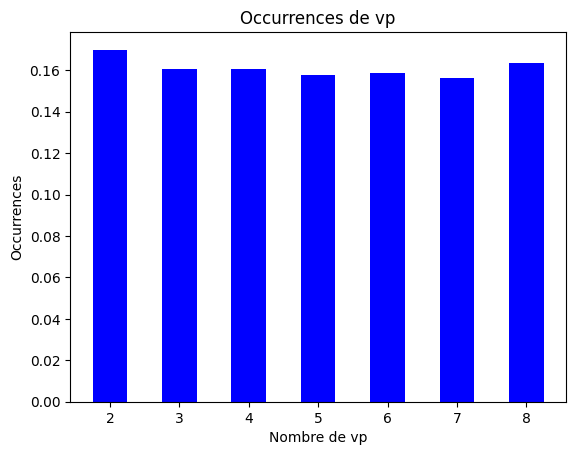

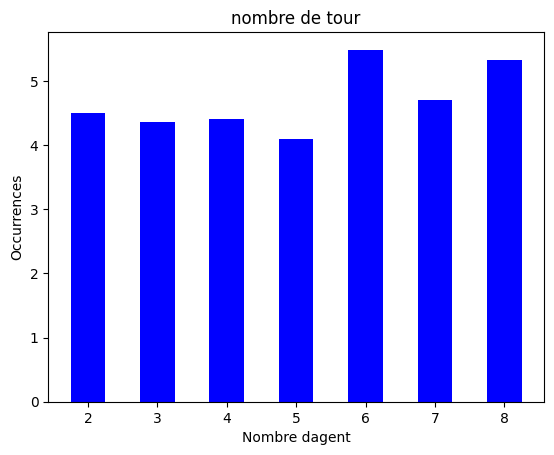

<Figure size 640x480 with 0 Axes>

In [4]:

import os


def create_csv_link(dossier):
    # Vérifier si le chemin spécifié est un dossier
    if not os.path.isdir(dossier):
        return "Le chemin spécifié n'est pas un dossier."

    # Initialiser le compteur de fichiers
    nombre_fichiers = 0
    liste_of_df=[]
    # Parcourir tous les éléments du dossier
    for element in os.listdir(dossier):
        chemin_element = os.path.join(dossier, element)
        # Vérifier si l'élément est un fichier
        
        df=pd.read_csv(chemin_element)
        liste_of_df.append(df)

    return liste_of_df


def all_graph_stat_vp(df_liste):
        occurence={}
        for i in df_liste : 
            if len(i["order"][0].split(",")) in occurence.keys() :
                occurence[len(i["order"][0].split(","))]=[analyse_mean_vp(i)+occurence[len(i["order"][0].split(","))][0],occurence[len(i["order"][0].split(","))][1]+1]
            else :
                occurence[len(i["order"][0].split(","))]=[analyse_mean_vp(i),1]
        reponse={}
        for key,value in occurence.items():
            
            reponse[key]=(value[0]/value[1])
        return reponse
    
def all_graph_stat_turn(df_liste):
        occurence={}
        for i in df_liste : 
            if len(i["order"][0].split(",")) in occurence.keys() :
                occurence[len(i["order"][0].split(","))]=[analyse_mean_turn(i)+occurence[len(i["order"][0].split(","))][0],occurence[len(i["order"][0].split(","))][1]+1]
            else :
                occurence[len(i["order"][0].split(","))]=[analyse_mean_turn(i),1]
        reponse={}
        for key,value in occurence.items():
            
            reponse[key]=(value[0]/value[1])
        return reponse
    
def affichage_graph_vp(donnees):
    
    vp = list(donnees.keys())
    occurrences = list(donnees.values())
    largeur_barre = max(0.5, min(0.15 * len(vp), 0.5)) 
    # Créer le graphique à barres
    plt.bar(vp, occurrences, color='blue',width=largeur_barre)

    # Ajouter des titres et des libellés
    plt.title('Occurrences de vp')
    plt.xlabel('Nombre de vp')
    plt.ylabel('Occurrences')
    plt.xticks(vp)
    plt.show()
    plt.clf()
    
def affichage_graph_turn(donnees):
    
    vp = list(donnees.keys())
    occurrences = list(donnees.values())
    largeur_barre = max(0.5, min(0.15 * len(vp), 0.5)) 
    # Créer le graphique à barres
    plt.bar(vp, occurrences, color='blue',width=largeur_barre)

    # Ajouter des titres et des libellés
    plt.title('nombre de tour')
    plt.xlabel('Nombre dagent')
    plt.ylabel('Occurrences')
    plt.xticks(vp)
    plt.show()
    plt.clf()
    
liste_of_df=create_csv_link("csv/same_ug_new_agents_csv_1")   
affichage_graph_vp(all_graph_stat_vp(liste_of_df))
affichage_graph_turn(all_graph_stat_turn(liste_of_df))


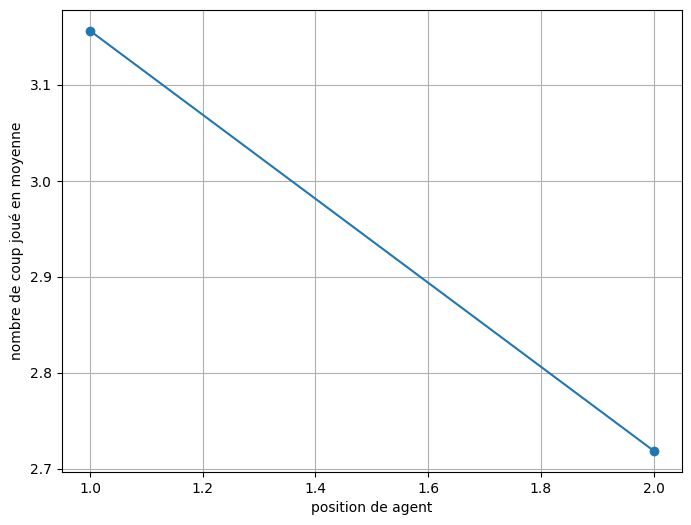

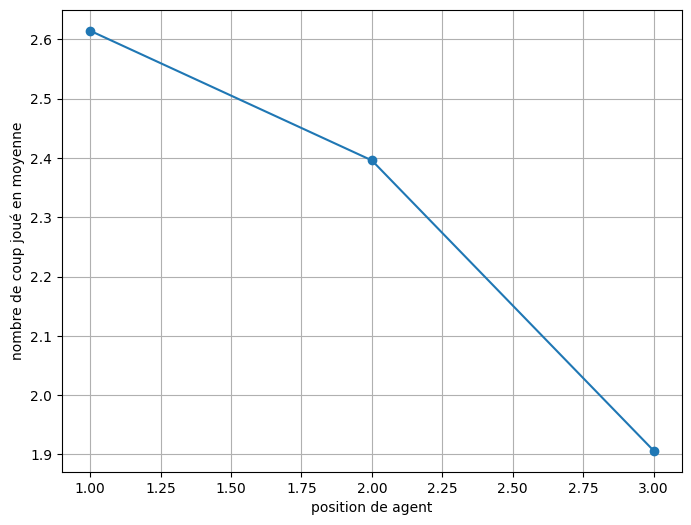

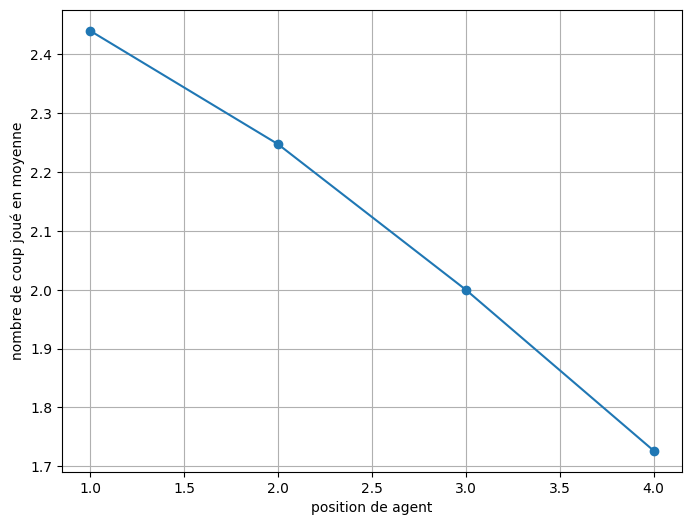

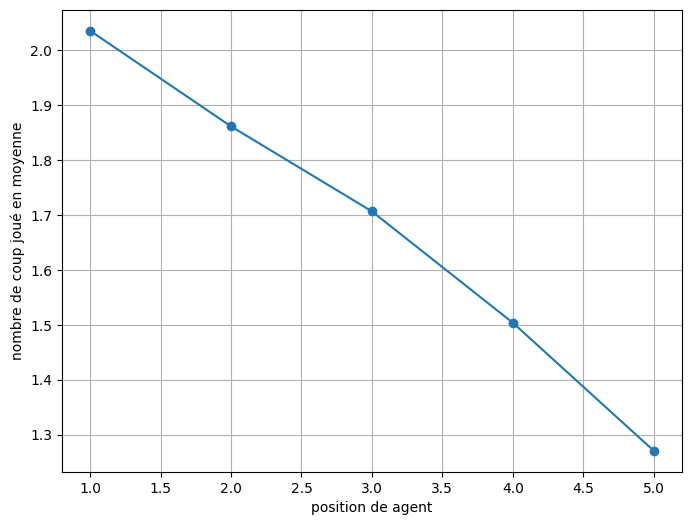

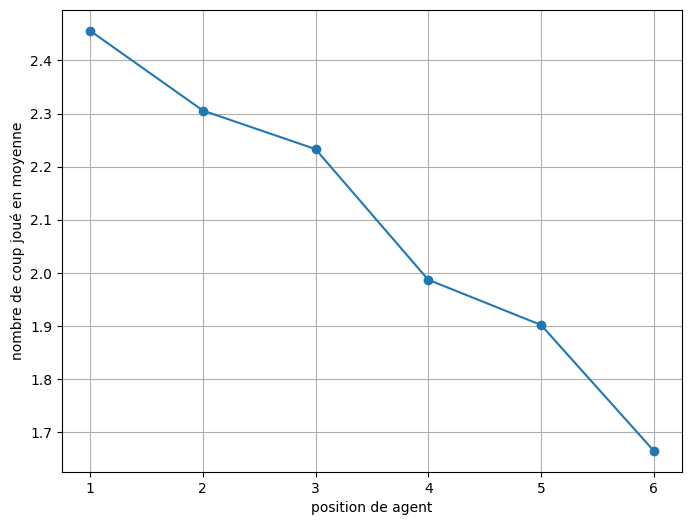

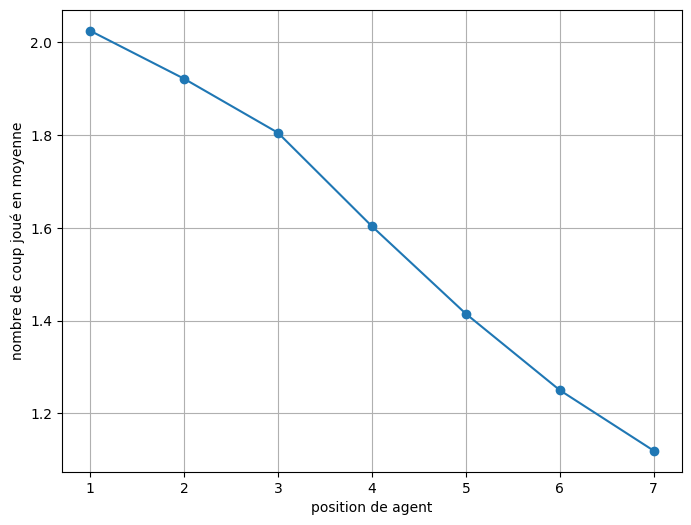

In [5]:

def number_argument_play(dfs,nbARG):
    taille = len(dfs[0])
    dpn = {}
    for i in range(nbARG):
        dpn[i+1]=0
    
    for df in dfs : 
        for j in range(taille) :
            ordre=1
            for i in df["order"][j].split(",") :
                dpn[ordre]=int(df[i[1]][j].split("None")[len(df[i[1]][j].split("None"))-1].split(",")[1])+int(dpn[ordre])
                ordre=ordre+1
    
    for i in range(nbARG):
        dpn[i+1]=dpn[i+1]/(taille*len(dfs))
   
    return dpn

def afficher_graphique(dictionnaire):
    # Extraire les clés et les valeurs du dictionnaire
    cles = list(dictionnaire.keys())
    valeurs = list(dictionnaire.values())
    
    # Créer le graphique
    plt.figure(figsize=(8, 6))
    plt.plot(cles, valeurs, marker='o', linestyle='-')
    
    # Ajouter des étiquettes et un titre
    plt.xlabel('position de agent')
    plt.ylabel('nombre de coup joué en moyenne')
    plt.title('')
    
    # Afficher le graphique
    plt.grid(True)
    plt.show()
  
def createAgentNumber(number):
    test=[] 
    for i in liste_of_df:
        if len(i["order"][0].split(","))==number:
            test.append(i)
    return test

for i in range(2,8):
    afficher_graphique(number_argument_play(createAgentNumber(i),i))
    
  
        

[['True', ' 2', ' 9]'], ['True', ' 1', ' 16]'], ['False', ' 4', ' 7]'], ['True', ' 3', ' 22]'], ['True', ' 2', ' 13]'], ['True', ' 1', ' 15]'], ['True', ' 1', ' 8]'], ['True', ' 2', ' 39]'], ['True', ' 2', ' 23]'], ['True', ' 1', ' 15]'], ['False', ' 3', ' 7]'], ['True', ' 3', ' 28]'], ['True', ' 3', ' 47]'], ['True', ' 1', ' 26]'], ['True', ' 1', ' 26]'], ['True', ' 1', ' 12]'], ['True', ' 0', ' 25]'], ['True', ' 2', ' 40]'], ['True', ' 1', ' 7]'], ['True', ' 1', ' 35]'], ['True', ' 1', ' 38]'], ['True', ' 1', ' 38]'], ['True', ' 2', ' 47]'], ['True', ' 1', ' 13]'], ['True', ' 2', ' 47]'], ['True', ' 1', ' 37]'], ['True', ' 0', ' 13]'], ['True', ' 3', ' 39]'], ['True', ' 2', ' 20]'], ['False', ' 4', ' 8]'], ['False', ' 1', ' 8]'], ['True', ' 1', ' 30]'], ['False', ' 6', ' 17]'], ['True', ' 1', ' 13]'], ['True', ' 5', ' 45]'], ['True', ' 1', ' 38]'], ['True', ' 1', ' 13]'], ['True', ' 0', ' 26]'], ['True', ' 6', ' 47]'], ['True', ' 1', ' 20]'], ['True', ' 1', ' 24]'], ['False', ' 3', '

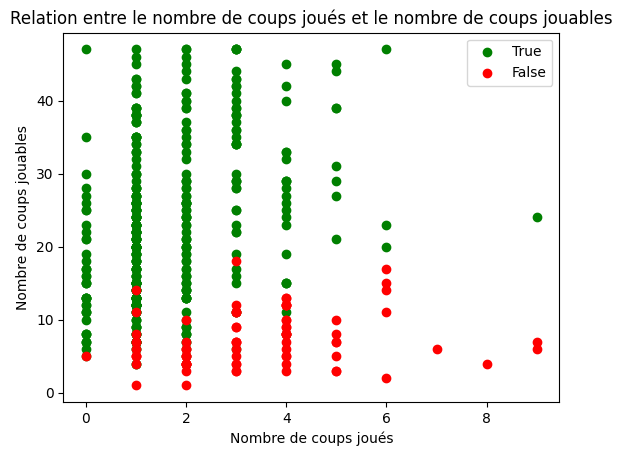

In [6]:
def number_argument_play_all_point(dfs):
    
    dpn = []
    
    
    for df in dfs : 
            for i in range(len(df["order"][0].split(","))) :
                boolean=df[f"{i}"][0].split(",")[1].strip()
                nb_coup_play=df[f"{i}"][0].split("None")[len(df[f"{i}"][0].split("None"))-1].split(",")[1]
                nb_coup_possible=df[f"{i}"][0].split("None")[len(df[f"{i}"][0].split("None"))-1].split(",")[3]
                dpn.append([boolean,nb_coup_play,nb_coup_possible])
    
   
    
    return dpn

data=number_argument_play_all_point(liste_of_df)
print(data)


# Nettoyer les espaces dans les données et convertir les valeurs en entiers
cleaned_data = [[d[0].strip(), d[1].strip(), d[2].strip()] for d in data]

# Séparer les données en deux listes : une pour les valeurs "True" et une pour les valeurs "False"
true_values = [(int(d[1]), int(d[2][:-1])) for d in cleaned_data if d[0] == 'True']
false_values = [(int(d[1]), int(d[2][:-1])) for d in cleaned_data if d[0] == 'False']

# Vérifier si les listes sont vides
if true_values:
    true_x, true_y = zip(*true_values)
else:
    true_x, true_y = [], []

if false_values:
    false_x, false_y = zip(*false_values)
else:
    false_x, false_y = [], []

# Créer le graphique
plt.scatter(true_x, true_y, color='green', label='True')
plt.scatter(false_x, false_y, color='red', label='False')

# Ajouter une légende
plt.legend()

# Ajouter des étiquettes
plt.xlabel('Nombre de coups joués')
plt.ylabel('Nombre de coups jouables')

# Afficher le graphique
plt.title('Relation entre le nombre de coups joués et le nombre de coups jouables')
plt.show()



In [7]:
import os
import shutil

def load_files_in_directory(path):
    files_to_load = []

    for filename in os.listdir(path):
        if filename.startswith("A"): # It means it's a public graph file.
            files_to_load.append(os.path.join(path, filename))
    return files_to_load

def load_attacks_from_file(filepath):
    attacks = []

    with open(filepath, 'r') as file:
        for line in file:
            if line.startswith("att"): # We only want to compare attacks
                # strip newline characters and add it to the attacks list
                attacks.append(line.strip())
    return attacks

def compare_attack_files(path):
    files = load_files_in_directory(path)
    attack_groups = {}

    for file in files:
        attacks = load_attacks_from_file(file)
        # Convert the list of attacks into a tuple
        attack_tuple = tuple(attacks)

        # Check if the attack tuple already exists in the dictionary (as key)
        if attack_tuple in attack_groups:
            attack_groups[attack_tuple].append(file)
        else:
            # If it doesn't, create a new group with the attack tuple as key and file as value
            attack_groups[attack_tuple] = [file]
    return attack_groups

def group_files_by_attack(directory_path):
    # Compare files to find identical attacks
    result = compare_attack_files(directory_path)

    # Create a folder for each attack cluster
    for i, (attacks, files) in enumerate(result.items()):
        cluster_folder = os.path.join(directory_path, f"Cluster_{i+1}")
        os.makedirs(cluster_folder, exist_ok=True)
        # Move files from the cluster to the corresponding folder
        for file in files:
            shutil.move(file, cluster_folder)
            
directory_path = ""
group_files_by_attack(directory_path)

FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: ''

In [8]:
import pandas as pd

# Définir les dictionnaires
dictionnaire1 = all_graph_stat_vp(liste_of_df)
dictionnaire2 = all_graph_stat_turn(liste_of_df)

# Créer un DataFrame initial avec les dictionnaires
df = pd.DataFrame({'vp': dictionnaire1, 'tour': dictionnaire2})

# Boucle pour ajouter d'autres dictionnaires au DataFrame
for i in range(2, 8):
    temp_dic = number_argument_play(createAgentNumber(i), i)
    nouveau_df = pd.DataFrame(temp_dic, index=[f"nbCoup/byTurnW{i}"]).T
    df = pd.concat([df, nouveau_df], axis=1)

# Afficher le DataFrame

print(df["nbCoup/byTurnW2"])
# Exporter le DataFrame au format CSV
df.to_csv('ForAllAgent.csv')

4        NaN
5        NaN
6        NaN
2    2.71875
7        NaN
3        NaN
8        NaN
1    3.15625
Name: nbCoup/byTurnW2, dtype: float64
